###
## Importing Necessary Stuff
###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

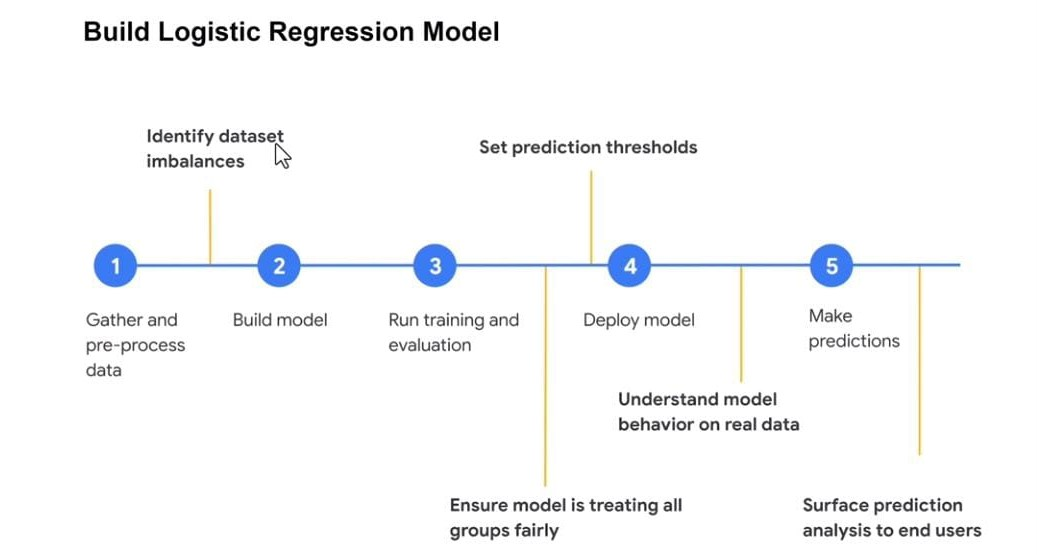

###
## Loading Dataset
###

In [2]:
ttn = pd.read_csv('titanic-1hotencoding.csv')
ttn

,survived,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,who_child,who_man,pclass_1,pclass_2
0,0,0,22,1,0,7.2500,1,0,0,0,0,1,0,0
1,1,1,38,1,0,71.2833,0,0,1,0,0,0,1,0
2,1,1,26,0,0,7.9250,0,1,0,0,0,0,0,0
3,1,1,35,1,0,53.1000,0,0,0,0,0,0,1,0
4,0,0,35,0,0,8.0500,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27,0,0,13.0000,1,1,0,0,0,1,0,1
887,1,1,19,0,0,30.0000,0,1,0,0,0,0,1,0
888,0,1,21,1,2,23.4500,0,0,0,0,0,0,0,0
889,1,0,26,0,0,30.0000,1,1,1,0,0,1,1,0


###
## Seperating Independent & Dependent Values
###

In [3]:
input_cols = list(ttn.columns[1:])
target_cols = 'survived'


In [4]:
X = ttn[input_cols]
y = ttn[target_cols]

###
## Importing train_test_split
###

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


###
## Checking Shapes
###

In [33]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((891, 13), (891,), (623, 13), (623,), (268, 13), (268,))

In [34]:
623/891, 268/891

(0.6992143658810326, 0.30078563411896747)

###
## Training Algorithm
###

In [35]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

###
## Predicting Unseen Data
###

In [36]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

###
## Orignal vs Predicted Values
###

In [37]:
pd.DataFrame({'Orignal Values' : y_test, 'Predicted Values' : model.predict(X_test)})

,Orignal Values,Predicted Values
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


###
## Checking Model's Score
**Note:**

**In logistic Regression, model's performance is checked by model.score instead by r2_score**

###

In [38]:
perf = model.score(X_test, y_test)
print(f"Model's Performance Score: {perf * 100:.3f} %")

Model's Performance Score: 81.716 %


###
## Performance Metrics
###

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, model.predict(X_test))}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, model.predict(X_test))}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')

Mean Absolute Error (MAE): 0.1828358208955224
Mean Squared Error (MSE): 0.1828358208955224
Root Mean Squared Error (RMSE): 0.4275930552470683
